# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [4]:
# ... ENTER YOUR CODE HERE
def polynomial_coefficient(x, m): 
    x = np.array(x)
    A = [] 
    
    for k in range(m + 1): 
        A.append(x**k)
        
    return np.array(A).T

In [5]:
def normal_equation(A, b):
    A_ = np.dot(A.T, A)
    b_ = np.dot(A.T, b)
    
    coef = np.linalg.solve(A_, b_)
    
    return coef

In [6]:
coefs = [] 

for m in range(10): 
    c = normal_equation(polynomial_coefficient(x, m), y)
    coefs.append(c)

In [7]:
coefs

[array([0.79066667]),
 array([-0.6479869 ,  1.46502399]),
 array([-1.25772058, -0.65313865,  1.0667959 ]),
 array([ 0.49483598, -0.26983377, -2.01973166,  1.01540301]),
 array([ 0.51184244, -0.33857023, -2.05689291,  1.08931365, -0.01872316]),
 array([ 0.53158296, -0.24431123, -2.15174437,  0.99954653,  0.07265921,
        -0.01835276]),
 array([ 0.58335489, -0.21341539, -2.47667914,  1.08743364,  0.3156542 ,
        -0.17478186,  0.02574425]),
 array([ 0.5744677 , -0.13006497, -2.3829579 ,  0.80842609,  0.3196533 ,
         0.0116892 , -0.06899496,  0.01366621]),
 array([ 0.53749246, -0.37095536, -2.06051933,  1.53912235, -0.54617266,
        -0.22834563,  0.51017192, -0.21721566,  0.02885626]),
 array([ 0.50918939, -0.43758283, -1.67901143,  1.61523578, -1.43465948,
         0.20209009,  0.91271625, -0.64210814,  0.16431079, -0.01477536])]

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

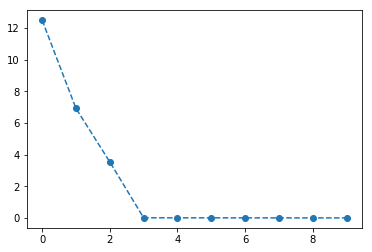

In [8]:
# ... ENTER YOUR CODE HERE ...
n = len(coefs)
sigma = [] 

for i in range(n): 
    A = np.array(coefs[i])
    X = polynomial_coefficient(x, i)
    
    res = 1 / (n - 1) * np.linalg.norm(np.dot(X, A.T) - y)**2
    sigma.append(res)

plt.plot(np.arange(n), np.array(sigma), 'o--')

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

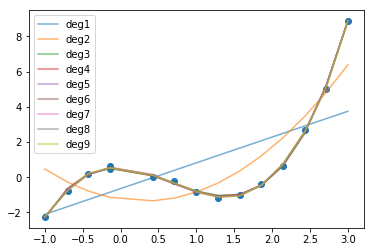

In [12]:
# ... ENTER YOUR CODE HERE
plt.scatter(x, y)

for i in range(1, len(coefs)): 
    func = np.poly1d(coefs[i][::-1])
    y_hat = func(x)
    
    slabel = 'deg' + str(i)
    plt.plot(x, y_hat, label=slabel, alpha=0.6)

plt.legend()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [13]:
# ... ENTER YOUR CODE HERE ...
def QR_fractorization(A, b): 
    q, r = np.linalg.qr(A)
    f = np.dot(q.T, b)
    x = np.linalg.solve(r, f)
    
    return x

In [14]:
coefs_QR = [] 

for m in range(10): 
    c = QR_fractorization(polynomial_coefficient(x, m), y)
    coefs_QR.append(c)

In [15]:
for i in range(len(coefs)): 
    print(coefs[i] - coefs_QR[i])

[1.11022302e-16]
[0.00000000e+00 2.22044605e-16]
[ 2.22044605e-16 -3.66373598e-15  1.33226763e-15]
[ 2.63677968e-14  2.10942375e-15 -3.59712260e-14  1.17683641e-14]
[ 5.99520433e-14 -1.38555833e-13 -1.12798659e-13  1.62092562e-13
 -3.78724829e-14]
[-5.27355937e-14 -6.08263440e-13  3.92574862e-13  6.05071548e-13
 -5.04332687e-13  9.45077350e-14]
[ 3.66706665e-13 -2.11469731e-13 -2.12541096e-12  1.04538600e-12
  1.41214818e-12 -1.05140896e-12  1.81781673e-13]
[-9.29589739e-13  3.19391735e-12  7.40874029e-12 -1.30196964e-11
 -2.28744801e-12  9.77593874e-12 -4.44264070e-12  6.05786254e-13]
[ 7.94352362e-11  5.28153687e-10 -6.89091895e-10 -1.61360902e-09
  1.87901728e-09  5.42426132e-10 -1.26895727e-09  5.03222602e-10
 -6.27044389e-11]
[ 1.85278415e-09  6.13430934e-09 -2.35161257e-08 -1.18733814e-08
  5.66534268e-08 -2.06724547e-08 -2.77428445e-08  2.54370588e-08
 -7.67457425e-09  8.07451665e-10]


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [21]:
# ... ENTER YOUR CODE HERE ...
def lagrange_polynomial(x, x_grid, k): 
    coef = 1 
    for i in range(len(x_grid)): 
        if i != k: 
            coef *= ((x - x_grid[i]) / (x_grid[k] - x_grid[i]))
            
    return coef

In [22]:
def lagrange_interpolation(x, x_grid, y_grid): 
    m = len(x_grid)
    poly = 0
    
    for i in range(m):
        poly += y_grid[i] * lagrange_polynomial(x, x_grid, i)
        
    return poly 

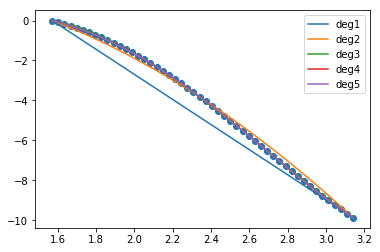

In [23]:
f = lambda x: x**2 * np.cos(x)
x = np.linspace(np.pi / 2, np.pi, 50)

plt.scatter(x, f(x))

for m in range(1, 6): 
    x_grid = np.linspace(np.pi / 2, np.pi, m + 1)
    y_hat = lagrange_interpolation(x, x_grid, f(x_grid))
    
    plt.plot(x, y_hat, label='deg' + str(m))
    
plt.legend()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [24]:
# ... ENTER YOUR CODE HERE ...
def chebyshv_nodes(a, b, m): 
    m += 1
    k = np.array(range(m))
    x = np.cos((2 * k + 1) / (2 * m) * np.pi)
    
    return 0.5 * (a + b) + 0.5 * (b - a) * x

[3.08180778 2.65675336 2.05563563 1.6305812 ]


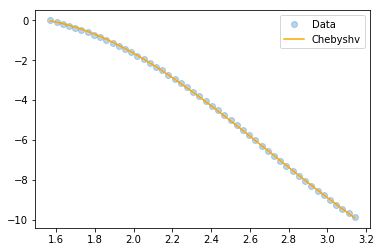

In [25]:
x_cheb = chebyshv_nodes(np.pi / 2, np.pi, 3)
print(x_cheb)

y_hat = lagrange_interpolation(x, x_cheb, f(x_cheb))

plt.plot(x, f(x), 'o', alpha=0.3, label='Data')
plt.plot(x, y_hat, c='orange', label='Chebyshv')
plt.legend()